Dataset extracted to: ./preprocessed_dataset
Dataset Summary:
Class 'weed': 1000 images
Class 'wheat': 1000 images

Displaying sample images from each class:


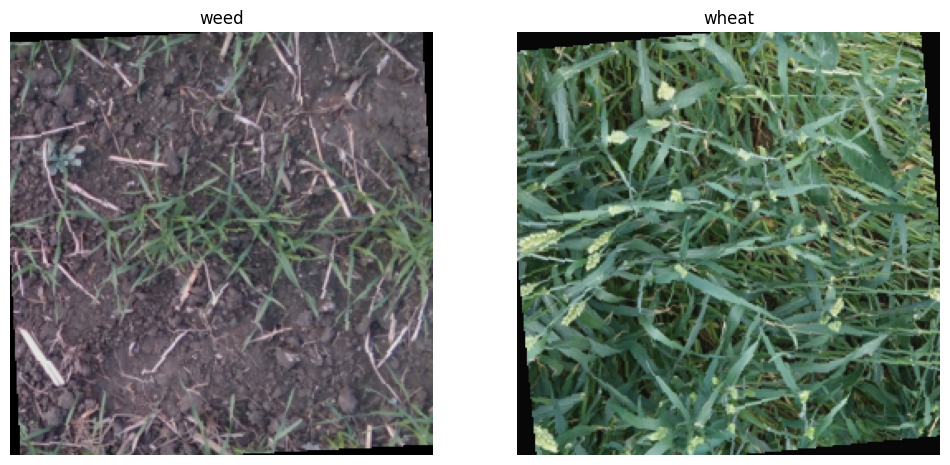

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

# Unzip the preprocessed dataset
def unzip_dataset(zip_file, extract_to='./preprocessed_dataset'):
    """
    Unzips the dataset and extracts it to the specified folder.
    """
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Dataset extracted to: {extract_to}")

# Summarize the dataset
def dataset_summary(dataset_path):
    """
    Prints the dataset summary including the number of images per class and displays sample images.
    """
    if not os.path.exists(dataset_path):
        print("Dataset path not found!")
        return
    
    # List of classes (folders in the dataset directory)
    classes = os.listdir(dataset_path)
    class_counts = {}

    for cls in classes:
        class_path = os.path.join(dataset_path, cls)
        if os.path.isdir(class_path):
            class_counts[cls] = len(os.listdir(class_path))
    
    # Print the summary
    print("Dataset Summary:")
    for cls, count in class_counts.items():
        print(f"Class '{cls}': {count} images")
    
    # Visualize sample images
    print("\nDisplaying sample images from each class:")
    plt.figure(figsize=(12, 6))
    for i, cls in enumerate(classes):
        class_path = os.path.join(dataset_path, cls)
        if os.path.isdir(class_path):
            sample_images = os.listdir(class_path)[:1]  # Display one sample per class
            for img_file in sample_images:
                img_path = os.path.join(class_path, img_file)
                img = Image.open(img_path)
                plt.subplot(1, len(classes), i + 1)
                plt.imshow(img)
                plt.title(cls)
                plt.axis('off')
    plt.show()

# Perform EDA
def perform_eda(zip_file, extract_to='./preprocessed_dataset'):
    """
    Performs EDA on the preprocessed dataset.
    """
    # Step 1: Unzip the dataset
    unzip_dataset(zip_file, extract_to)
    
    # Step 2: Perform dataset summary and visualization
    dataset_summary(extract_to)

# Path to your preprocessed dataset zip file
zip_file = './preprocessed_dataset.zip'

# Perform EDA
perform_eda(zip_file)
